In [2]:
!pip install plotly

In [28]:
# Importation des bibliotheuques necessaires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import plotly.express as px 
from sklearn.decomposition import PCA

In [29]:
from sklearn import preprocessing

In [30]:
# Importation des données
data= pd.read_csv("healthcare-dataset-stroke-data.csv")

In [31]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
data.duplicated().sum()

0

In [32]:
data.drop(["id"], axis=1, inplace=True) 

In [33]:
data.shape

(5110, 11)

In [34]:
#statistiques descriptives sur les données
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [35]:
#le type des variables
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<AxesSubplot:>

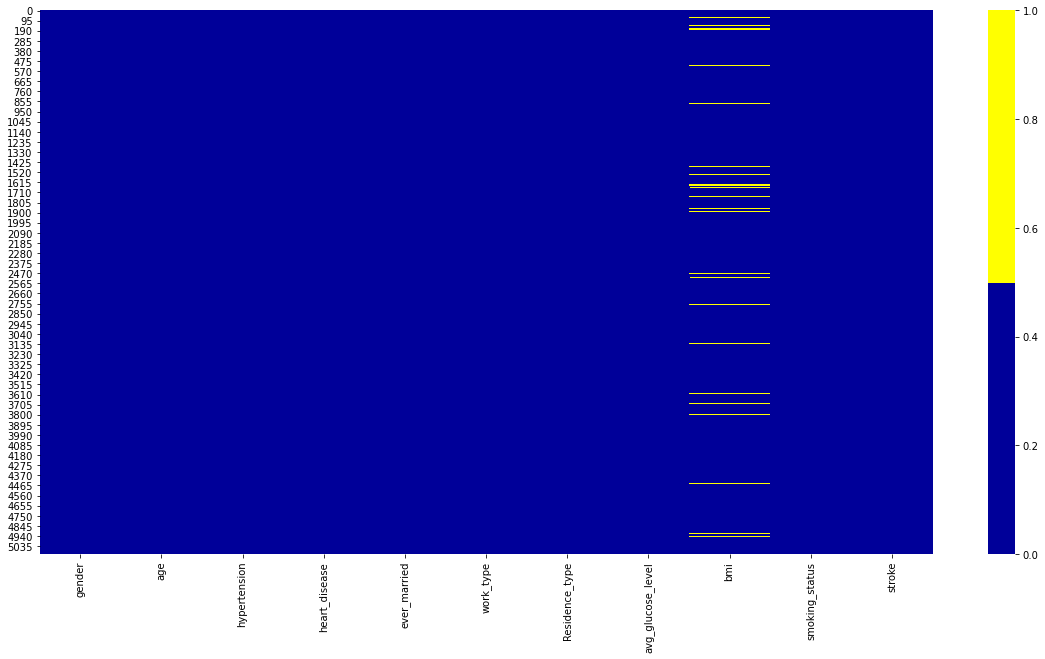

In [12]:
# chercher les valeurs nulles
plt.figure(figsize = (20,10))
cols = data.columns[:76] # first 76 columns
colours = ['#000099', '#ffff00'] # coleurs - jaune null. bleue pas null.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [13]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [36]:
taux_bmi_null=data["bmi"].isnull().sum()/data.shape[0]*100
print("le taux de la variable bmi en pourcentage", taux_bmi_null)

le taux de la variable bmi en pourcentage 3.9334637964774952


In [37]:
data["bmi"].median()

28.1

In [38]:
# nous remplaçons les valeurs nulles de la vraiables bmi par sa mediane
data["bmi"]=data["bmi"].replace(np.nan, data["bmi"].median())

In [39]:
data["bmi"].isnull().sum()

0

In [40]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [41]:
# la repartition des personnes atteintes selon le genre
y = data["stroke"]  
fig = px.pie(values=y, names=data["gender"]) 
fig.show()

Segmentation de notre dataset selon la tranche d age afin de visualiser la tranche d age la plus touchée par les attaques cardiaques

In [42]:
labels = [ "{0} - {1}".format(i, i + 19) for i in range(0, 100, 20) ]
c = pd.cut(data.age, np.arange(0, 101, 20),
           include_lowest=True, right=False,
           labels=labels)

df=data.groupby(c).sum()
var=df["age"].index
var
df["var"]=var

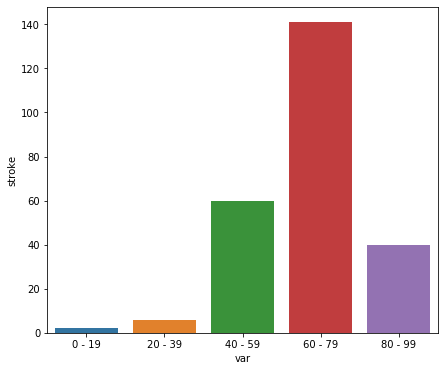

In [49]:
plt.figure(figsize=(7, 6))
sns.barplot(x='var',y="stroke",  data=df);

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

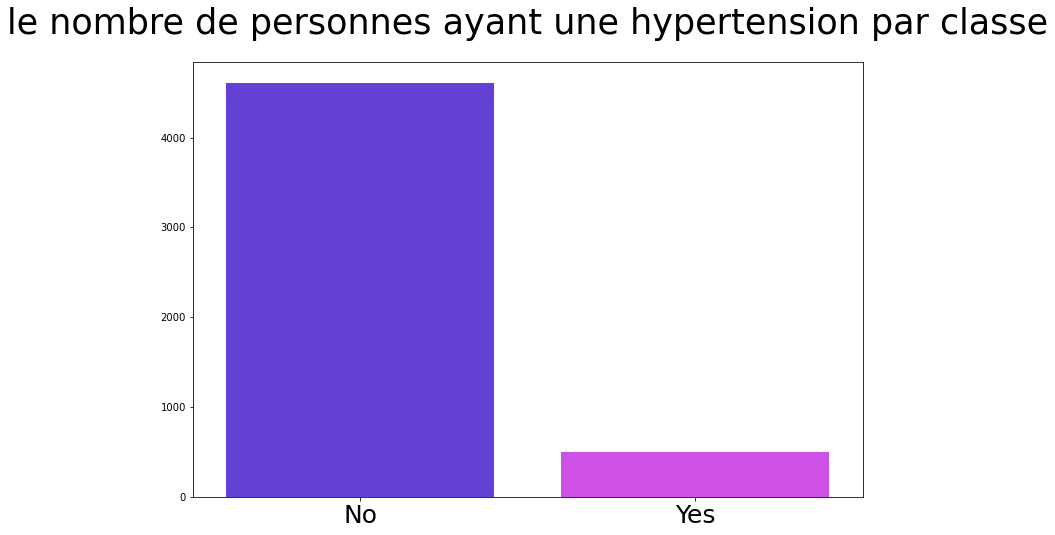

In [43]:
two_colors = ['#dd38ff', '#5727ed']
plt.figure(figsize=(12, 8))
hypertension_plot = sns.countplot(x=data.hypertension,
                            palette=two_colors[::-1])
hypertension_plot.set_title('le nombre de personnes ayant une hypertension par classe',
                      fontsize=35, y=1.05)
hypertension_plot.set(xlabel=None, ylabel=None)
plt.grid(False)
hypertension_plot.set_xticklabels(['No', 'Yes'], size=25)

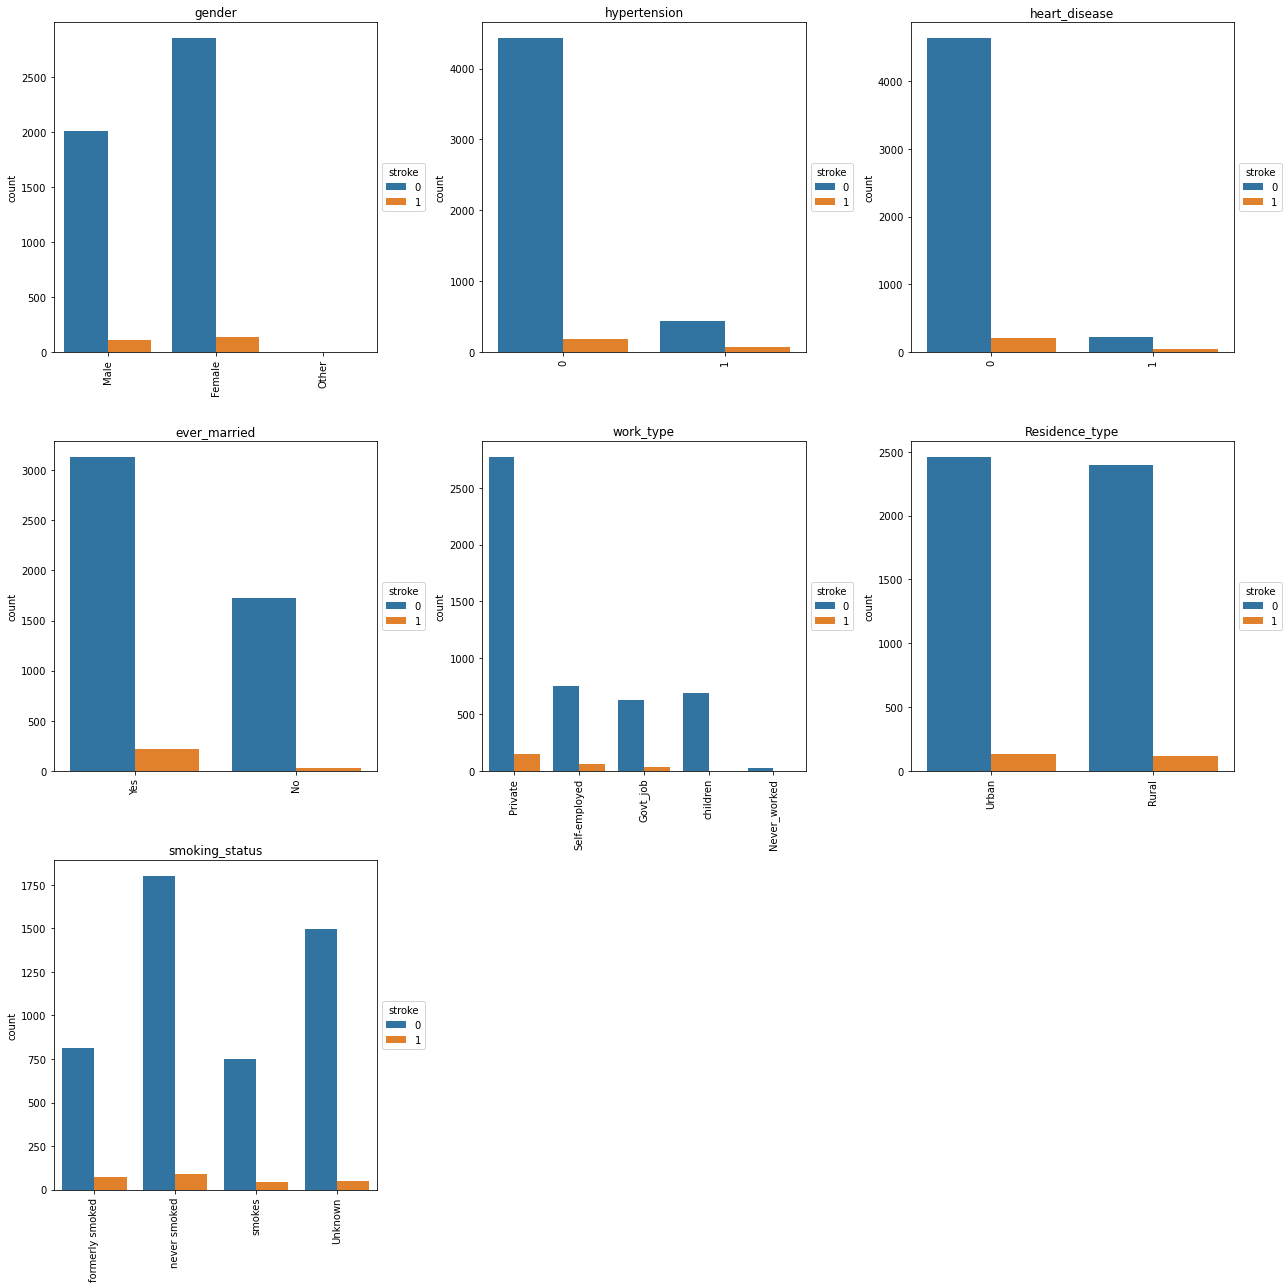

In [44]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'Residence_type', 'smoking_status']

fig, ax = plt.subplots(3,3,figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
    
  sns.countplot(data=data, x=col, hue='stroke', ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)
  axes_list[i].legend(title='stroke', loc='center left', bbox_to_anchor=(1, 0.5))

  plt.setp(axes_list[i].get_xticklabels(), rotation=90)
  

axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

In [45]:
# les variables numeriques de notre dataset
dnum=pd.DataFrame({})
for att in data.columns:
    if data[att].dtype in ("float64" , "int64"):
        dnum[att]=data[att]
dnum

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,28.1,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [46]:
# les variables categorielles de notre dataset encodées
categorical_attributes = data.select_dtypes("object").columns.tolist()
print(categorical_attributes)
cat_data = data[categorical_attributes]

label_encoder = preprocessing.LabelEncoder()

for column in cat_data:
    cat_data[column] = label_encoder.fit_transform(cat_data[column])

cat_data

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


<ipython-input-46-61bc5c44bb2d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2
...,...,...,...,...,...
5105,0,1,2,1,2
5106,0,1,3,1,2
5107,0,1,3,0,2
5108,1,1,2,0,1


In [47]:
data_f=pd.concat([cat_data, dnum], axis = 1)

In [55]:
# Normalisation des données
# Selection des attributs à normaliser
df_pure = data_f.drop(labels=['stroke'], axis=1)
df_num = preprocessing.StandardScaler().fit_transform(df_pure)
df_num = pd.DataFrame(df_num, columns = df_pure.columns)
df_num

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1.188073,0.723884,-0.153836,0.984080,-0.351781,1.051434,-0.328602,4.185032,2.706375,1.005086
1,-0.840344,0.723884,0.763438,-1.016178,0.581552,0.786070,-0.328602,-0.238947,2.121559,-0.098981
2,1.188073,0.723884,-0.153836,-1.016178,0.581552,1.626390,-0.328602,4.185032,-0.005028,0.472536
3,-0.840344,0.723884,-0.153836,0.984080,1.514885,0.255342,-0.328602,-0.238947,1.437358,0.719327
4,-0.840344,0.723884,0.763438,-1.016178,0.581552,1.582163,3.043196,-0.238947,1.501184,-0.631531
...,...,...,...,...,...,...,...,...,...,...
5105,-0.840344,0.723884,-0.153836,0.984080,0.581552,1.626390,3.043196,-0.238947,-0.494658,-0.098981
5106,-0.840344,0.723884,0.763438,0.984080,0.581552,1.670617,-0.328602,-0.238947,0.420775,1.446713
5107,-0.840344,0.723884,0.763438,-1.016178,0.581552,-0.363842,-0.328602,-0.238947,-0.511443,0.225745
5108,1.188073,0.723884,-0.153836,-1.016178,-0.351781,0.343796,-0.328602,-0.238947,1.328257,-0.423706


Afin de selectionner les meilleurs attributs, nous utiliserons une Analyse en Composante principales
Pour cela, nous choisirons les variables les  plus correlées avec la classe de prediction

In [56]:
df_num["stroke"]=data["stroke"]
df_cor = df_num.corr("pearson")
cor_target = abs(df_cor["stroke"])
best_attributes = cor_target.sort_values(ascending=False).iloc[:11]


print(f"la correlation attributs:\n{best_attributes.drop('stroke')}")
best_attributes = list(best_attributes.index)

la correlation attributs:
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.036110
work_type            0.032316
smoking_status       0.028123
Residence_type       0.015458
gender               0.008929
Name: stroke, dtype: float64


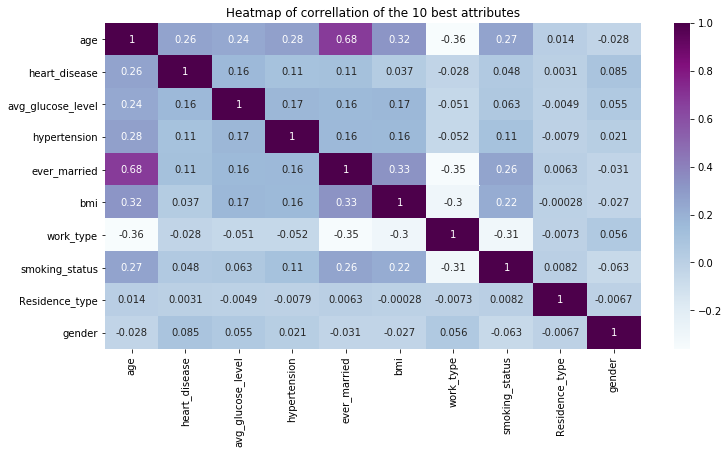

In [57]:
# Correlation entre nos 5 meilleurs variables
# nous constatons qu il n y a pas une forte correlation entre nos variable
df_cov = data_f.loc[:, best_attributes[1:]].T
covariance_matrix = np.corrcoef(df_cov)

plt.figure(figsize = (12,6))
sns.heatmap(covariance_matrix, annot=True, cmap="BuPu", xticklabels=best_attributes[1:], yticklabels=best_attributes[1:])
plt.title("Heatmap of correllation of the 10 best attributes")      
plt.show()

In [58]:
y_train = df_num["stroke"]
X_train = df_num.drop(["stroke"], axis=1)
test_perc = 0.2
X_t, X_test, y_t, y_test = train_test_split(X_train, y_train, test_size=test_perc, random_state=0, shuffle=True)


In [59]:

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.1, random_state=0, shuffle=True)

In [60]:
X_train

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
3399,-0.840344,0.723884,-1.988384,-1.016178,1.514885,1.582163,3.043196,4.185032,-0.497750,-0.969245
824,-0.840344,0.723884,-1.988384,-1.016178,0.581552,-0.231159,-0.328602,-0.238947,-0.647709,-0.202893
1988,-0.840344,0.723884,-0.153836,-1.016178,-1.285114,-0.275387,-0.328602,-0.238947,-0.251279,2.602736
201,1.188073,0.723884,-0.153836,0.984080,-0.351781,1.626390,3.043196,4.185032,1.527024,0.342646
2956,-0.840344,-1.381436,1.680712,-1.016178,-1.285114,-1.690663,-0.328602,-0.238947,-1.024041,-1.683642
...,...,...,...,...,...,...,...,...,...,...
549,1.188073,0.723884,-0.153836,0.984080,0.581552,1.493708,-0.328602,-0.238947,1.936484,-0.306805
1383,-0.840344,0.723884,-0.153836,0.984080,0.581552,-0.850343,-0.328602,-0.238947,-0.363692,1.277855
3111,1.188073,0.723884,-1.988384,0.984080,-0.351781,0.653388,-0.328602,-0.238947,1.208555,-0.098981
1335,-0.840344,0.723884,0.763438,-1.016178,0.581552,1.405253,-0.328602,-0.238947,-0.692542,0.459547


In [70]:
y_val[y_val==0].shape

(396,)

In [48]:
# Resultat for Visual Comparison
accu_dict = {}

# Dictionary  of labels for test preditions and list of score fonctions
pred_dict = {}
scorers = {"Accuracy": 'accuracy', "Precision": 'precision_micro', "F1": 'f1_micro'}


In [49]:
model = RandForestClassifier(X_train, y_train_not_bin, X_val, y_val_not_bin, class_names, scorers)
model.train_default(verbose=True)

print(model.__class__.__name__)

NameError: name 'RandForestClassifier' is not defined

In [ ]:
# Cut the dataframe
df_num_cut = df_num.loc[:, best_attributes[1:]]

def apply_PCA(n_components, data):
    """
    Applies a PCA with the given number of components

    :param int n_components default=2: Number of components to have in the PCA
    :return (pca, DataFrame): PCA & PCA DataFrame
    """
    
    # Retreiving the features' values
    x = data.drop(labels=['stroke'], axis=1).values

    pca = PCA(n_components=n_components)

    components = pca.fit_transform(x)

    columns = ['PC'+str(i+1) for i  in range(n_components)]

    pca_df = pd.DataFrame(data = components, columns = columns)
    pca_df = pd.concat([pca_df, data[['stroke']]], axis = 1)

    pca_vars = list(pca.explained_variance_ratio_)
    exp_vars = {"PC"+str(i+1): float(pca_vars[i]) for i in range(n_components)}

    exp_var_df = pd.DataFrame([exp_vars])
    exp_var_df.index = ["Variance expliquee (%)"]
    exp_var_df = exp_var_df * 100

    print(f'{exp_var_df}\n')

    return pca, pca_df

In [ ]:
df_avec_class_cut = df_num_cut.copy()
df_avec_class_cut["stroke"] = data_f.stroke
df_avec_class_cut

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_2cp, pca_2cp_df = apply_PCA(2, df_avec_class_cut)
pca_3cp, pca_3cp_df = apply_PCA(3, df_avec_class_cut)
pca_4cp, pca_4cp_df = apply_PCA(4, df_avec_class_cut)
pca_5cp, pca_5cp_df = apply_PCA(5, df_avec_class_cut)

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(range(1, len(list(pca_5cp_df.columns))), pca_5cp.explained_variance_ratio_, marker='o', color="b")

plt.ylabel('Ratio de Variance Expliquee')
plt.xlabel('Composantes principales')

plt.title("Diagram de Variance expliquee")
plt.show()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_perc, random_state=0, shuffle=True)

In [52]:
!pip install imblearn --user

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)


In [54]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'